In [23]:
#Read the dataset and understand the features and target variable.
%matplotlib inline

In [24]:
import numpy as np

In [119]:
import warnings
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [143]:
def optimal_cluster_analysis(X, n_clusters, cluster_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    # 1st plot - silhoutte analysis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot - showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [144]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['Industrial_Risk', 'Management_Risk', 'Financial_Flexibility', 'Credibilit', 'Competitiveness', 'Operating_Risk','Class']
  

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

Bank_df = pd.read_csv("/Users/chinki/Downloads/Qualitative_Bankruptcy.data.txt", names= colnames)

In [145]:
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split

In [146]:
Bank_df.head()
Bank_df.dtypes

Industrial_Risk          object
Management_Risk          object
Financial_Flexibility    object
Credibilit               object
Competitiveness          object
Operating_Risk           object
Class                    object
dtype: object

In [147]:
Bank_df[~Bank_df.applymap(np.isreal).all(1)]

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibilit,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [148]:
Bank_df.describe().transpose()

,count,unique,top,freq
Industrial_Risk,250,3,N,89
Management_Risk,250,3,N,119
Financial_Flexibility,250,3,N,119
Credibilit,250,3,N,94
Competitiveness,250,3,N,103
Operating_Risk,250,3,N,114
Class,250,2,NB,143


In [149]:
Bank_encoded= pd.get_dummies(Bank_df.iloc[:,:-1])
Bank_encoded


,Industrial_Risk_A,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_A,Management_Risk_N,Management_Risk_P,Financial_Flexibility_A,Financial_Flexibility_N,Financial_Flexibility_P,Credibilit_A,Credibilit_N,Credibilit_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating_Risk_A,Operating_Risk_N,Operating_Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
5,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
7,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
8,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
9,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1


In [150]:
Bank_df.groupby(["Class"]).count()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibilit,Competitiveness,Operating_Risk
Class,,,,,,
B,107,107,107,107,107,107
NB,143,143,143,143,143,143


In [153]:
#Split the dataset into training and test data ( Take 80:20 ratio). 
array = Bank_encoded.values
X = array[:,0:16] # select all rows and first 7 columns which are the attributes
Y = array[:,17]   # select all rows and the 7th column which is the classification "Yes", "No" for diabeties
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [154]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [155]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00502513 -0.55807079 -0.44531354  0.26910669 -0.27785992  0.05320642
   0.01234969  0.05002479 -0.07293824 -0.0739527  -0.07489262  0.1494515
   0.0639802  -0.07997562  0.02765206  0.23417015]
 [-0.55807079  1.00502513 -0.50204094 -0.28489854  0.38210324 -0.15720694
  -0.07967636  0.11837241 -0.05749894  0.03800732  0.04998066 -0.08874652
  -0.14808355  0.28132267 -0.16434547 -0.08222967]
 [-0.44531354 -0.50204094  1.00502513  0.02678893 -0.12245151  0.11403672
   0.07302195 -0.17970571  0.13795572  0.0360629   0.02413548 -0.06001216
   0.09297987 -0.21994144  0.14835012 -0.15528349]
 [ 0.26910669 -0.28489854  0.02678893  1.00502513 -0.57251449 -0.33494881
   0.05334563 -0.09325673  0.05526057 -0.10840376  0.02725325  0.07670823
  -0.07841092 -0.07812771  0.14980762  0.13920069]
 [-0.27785992  0.38210324 -0.12245151 -0.57251449  1.00502513 -0.58798856
  -0.19356607  0.28146333 -0.13237242 -0.04429745  0.23752364 -0.20384824
  -0.09704614  0.29395176 -0.221991

In [156]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 6.38972104e-02  5.05904885e-01  3.34621153e-02  1.44938146e-01
   3.53104839e-01 -2.57773782e-01  1.96951624e-01 -1.15691297e-01
  -3.41480093e-01 -1.53090559e-01  1.83271508e-02 -2.79680060e-02
  -7.00679124e-02 -4.49933378e-01  1.30155427e-01 -1.17861290e-01]
 [-1.63299072e-01 -4.33925269e-01 -1.43581894e-01  4.41399319e-02
  -2.43501639e-01  3.95424321e-01  3.36327801e-01  3.93422450e-02
  -7.42825497e-02  7.83646106e-02 -2.50292360e-01 -2.89424343e-02
  -7.25091359e-02 -4.65609425e-01  1.34690149e-01 -1.21967674e-01]
 [ 1.09467659e-01 -5.92291826e-02  1.19916333e-01 -1.98553778e-01
  -1.05330323e-01 -1.57733347e-01 -5.67692713e-01  7.81006623e-02
   4.35772107e-01  7.49937800e-02  2.50708483e-01 -2.68498945e-02
  -6.72667210e-02 -4.31945836e-01  1.24952043e-01 -1.13149404e-01]
 [ 7.67602035e-02  4.62688013e-01 -4.97939231e-02 -1.48834271e-01
   4.01390664e-03  5.67784204e-01 -3.73181414e-02  2.72095031e-01
  -1.18488461e-03  2.24217330e-01  1.06370774e-01 -3.46

In [157]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)



Cumulative Variance Explained [ 27.44967338  40.75877909  51.06075367  60.98052191  69.50504343
  77.37446384  85.08748204  91.11887582  95.58907317  98.54085668
 100.         100.         100.         100.         100.
 100.        ]


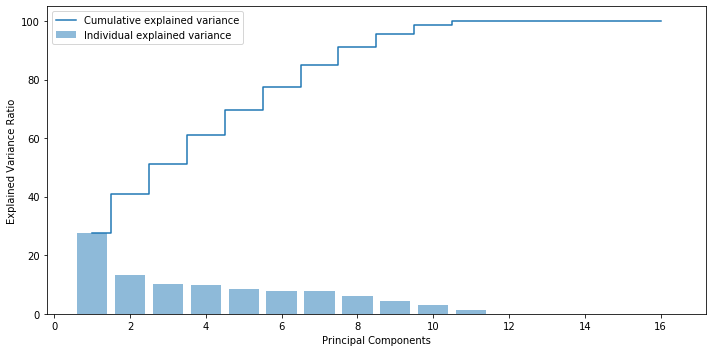

In [158]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [159]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:10]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std, P_reduce)   # projecting training data onto the eight eigen vectors
Proj_test_data= np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [160]:
print(y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(200,)


((200, 16), (16, 10), (200, 10))

In [161]:
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics


from sklearn.metrics import recall_score
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()

model.fit(Proj_train_data, y_train)
#predicted_values = model.predict(Proj_test_data)


y_predict = model.predict(Proj_test_data)
model_score = model.score(Proj_test_data, y_test)


print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.84
[[30  4]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.75      0.75      0.75        16

    accuracy                           0.84        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.84      0.84      0.84        50



/Users/chinki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [162]:
#Display elbow plot to find out reduced number of dimensions (which covers more than
#95% of the variance).

cum_var_exp = np.cumsum(model.explained_variance_ratio_)
print(cum_var_exp)

AttributeError: 'LogisticRegression' object has no attribute 'explained_variance_ratio_'

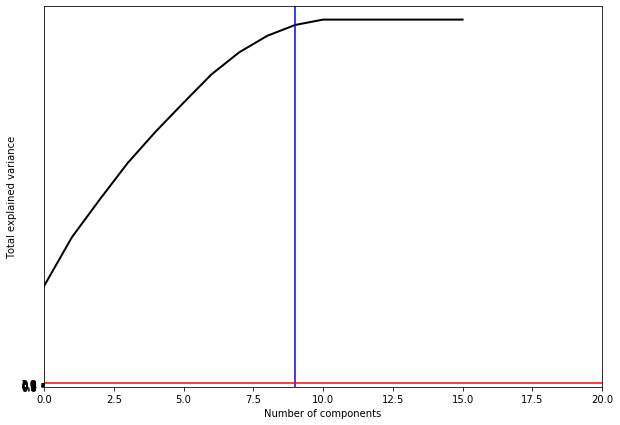

In [163]:
plt.figure(figsize=(10,7))

plt.plot(cum_var_exp, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0,20)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(9, c='b') 
plt.axhline(0.95, c='r')

plt.show()

In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)  
X_train_std_pc = pca.fit_transform(X_train_std) 
  
explained_variance = pca.explained_variance_ratio_ 

In [165]:
X_train_std_pc

array([[ 1.93618309, -1.38656313, -1.1322275 , -0.3566951 ],
       [-0.84641522, -2.46343704, -1.02690454,  1.72596833],
       [-2.5470796 ,  0.77936239,  0.88404337, -2.53065198],
       [-1.33619363, -1.54438131, -2.04386221, -0.28726182],
       [ 2.50937991,  1.03287509, -0.07126001,  0.31882345],
       [ 2.32006928,  0.84467406,  0.34913018, -0.49518099],
       [-2.55987808,  0.95666241, -0.58959319,  3.2605112 ],
       [-2.57508399,  0.99563212,  0.59762977, -0.86653497],
       [-1.33619363, -1.54438131, -2.04386221, -0.28726182],
       [ 2.98086516, -0.93478935, -0.34358943, -0.00806897],
       [-2.55987808,  0.95666241, -0.58959319,  3.2605112 ],
       [ 3.02191162, -0.41811187, -1.16078983, -0.22676491],
       [-0.81841083, -2.67970677, -0.74049093,  0.06185132],
       [-2.23637103,  2.67063244, -2.03294837,  1.60164082],
       [-2.55882344, -1.07192457,  2.377677  ,  0.31905144],
       [-1.0094681 , -2.63091518, -0.60355614, -2.20596686],
       [-2.46847475,  2.

For n_clusters = 2 The average silhouette_score is : 0.38686530815001885


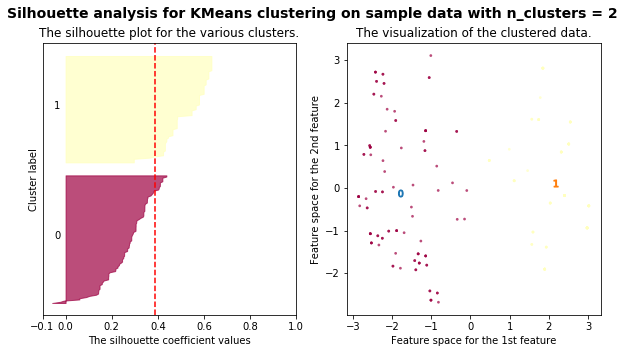

For n_clusters = 3 The average silhouette_score is : 0.373671752827615


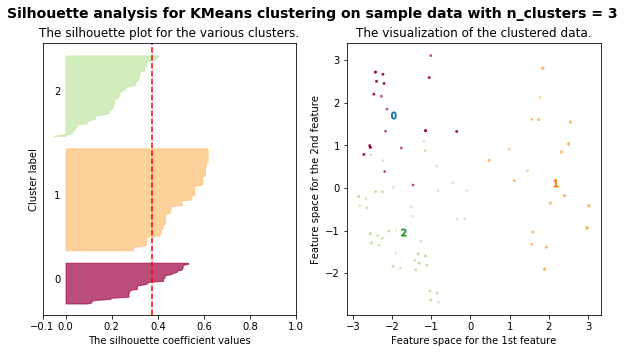

For n_clusters = 4 The average silhouette_score is : 0.37824702699222695


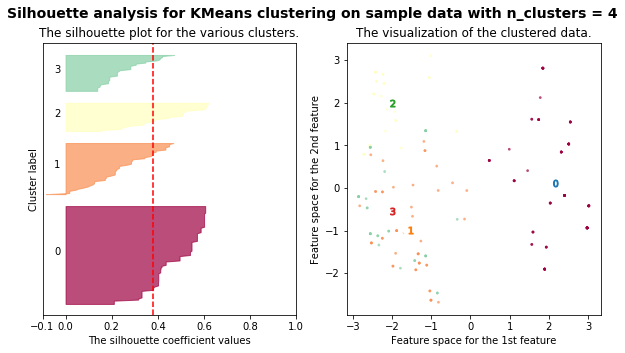

For n_clusters = 5 The average silhouette_score is : 0.3506224112008198


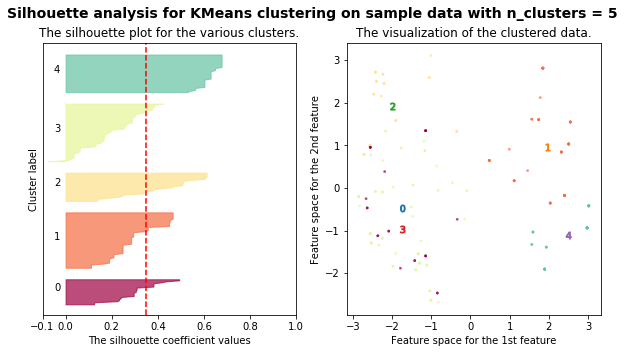

For n_clusters = 6 The average silhouette_score is : 0.37526429113863047


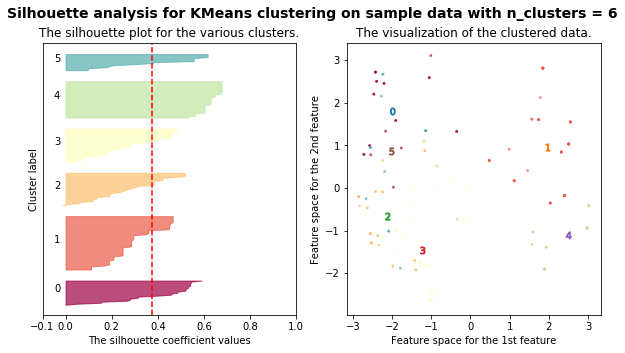

For n_clusters = 7 The average silhouette_score is : 0.38026407861224487


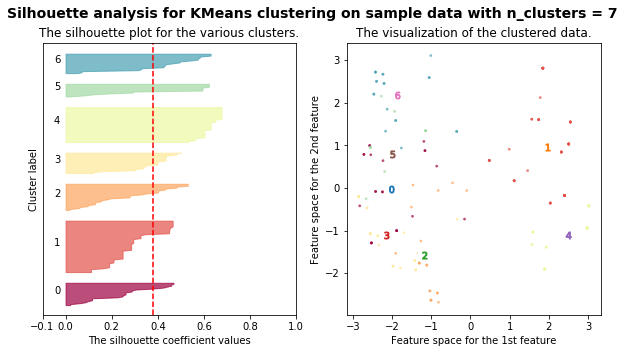

For n_clusters = 8 The average silhouette_score is : 0.39401303717499625


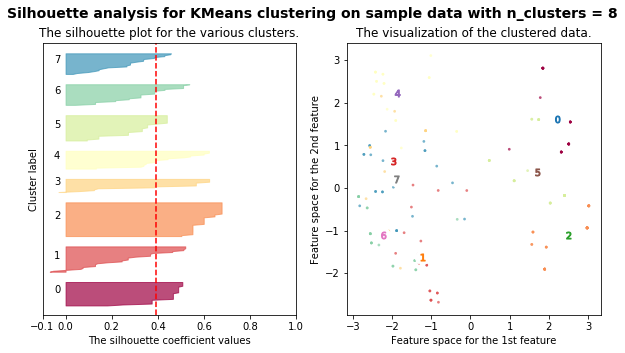

For n_clusters = 9 The average silhouette_score is : 0.40675044079036227


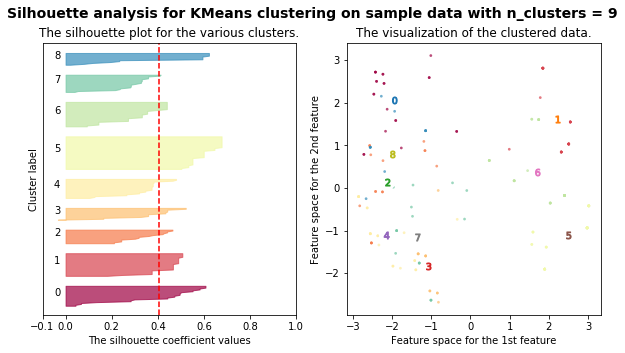

For n_clusters = 10 The average silhouette_score is : 0.42243639310731723


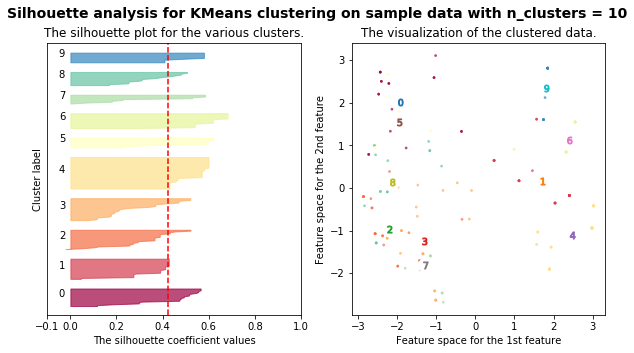

For n_clusters = 11 The average silhouette_score is : 0.41107340737079023


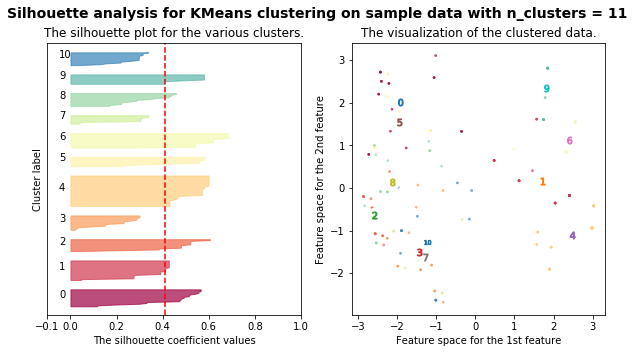

For n_clusters = 12 The average silhouette_score is : 0.4266862659951667


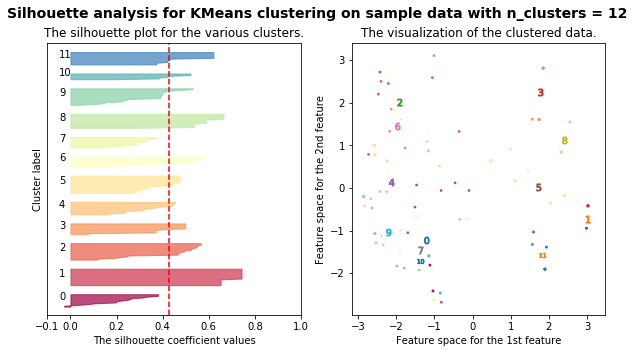

For n_clusters = 13 The average silhouette_score is : 0.4201733574788932


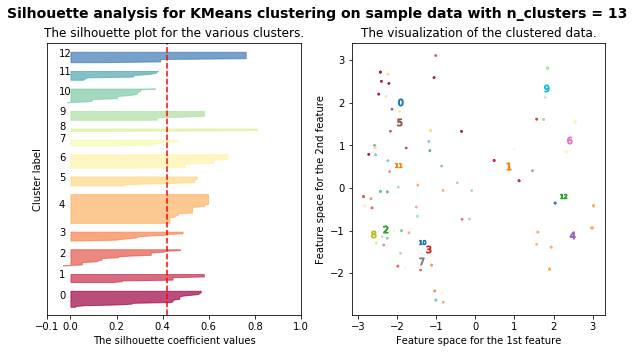

For n_clusters = 14 The average silhouette_score is : 0.4239971302925097


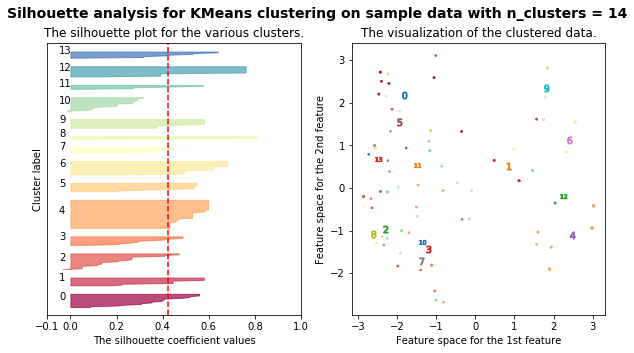

For n_clusters = 15 The average silhouette_score is : 0.44894668545288846


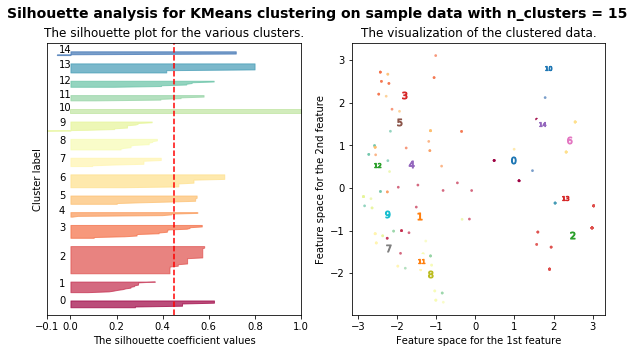

For n_clusters = 16 The average silhouette_score is : 0.45083215422334816


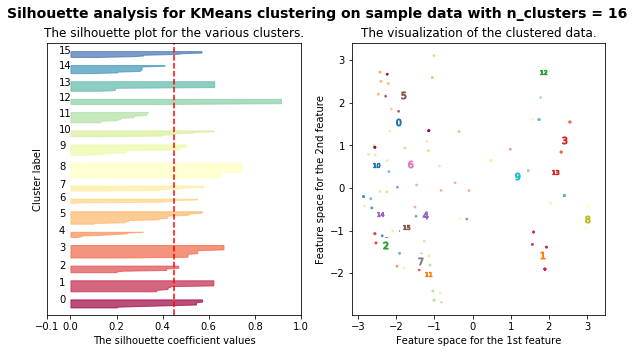

For n_clusters = 17 The average silhouette_score is : 0.46903857587192216


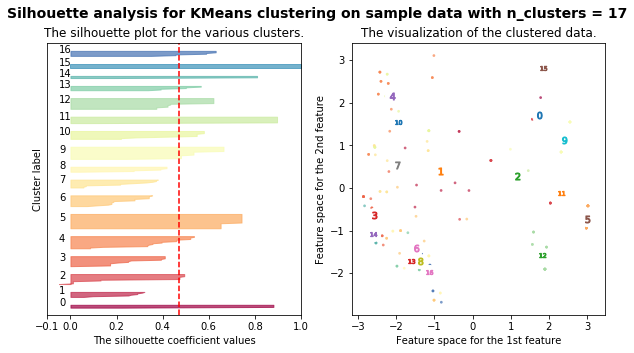

For n_clusters = 18 The average silhouette_score is : 0.49035342388150255


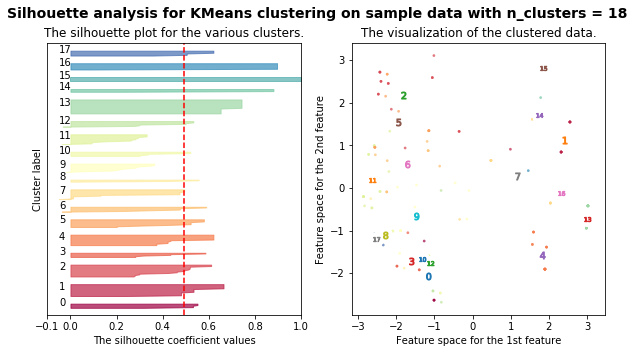

For n_clusters = 19 The average silhouette_score is : 0.4543409560623456


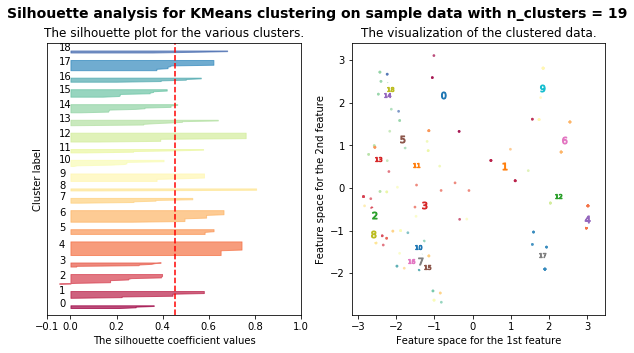

For n_clusters = 20 The average silhouette_score is : 0.48777902271268503


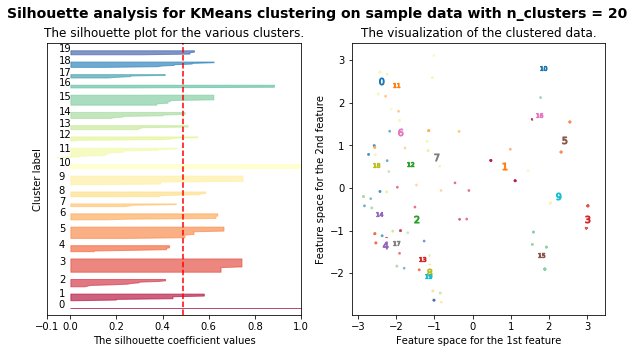

For n_clusters = 21 The average silhouette_score is : 0.499689058635435


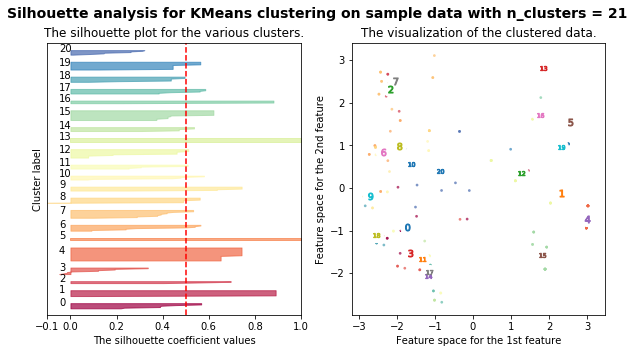

For n_clusters = 22 The average silhouette_score is : 0.5010702440742547


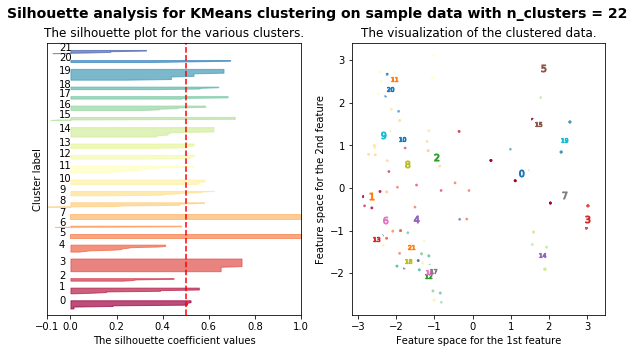

For n_clusters = 23 The average silhouette_score is : 0.5087900069975589


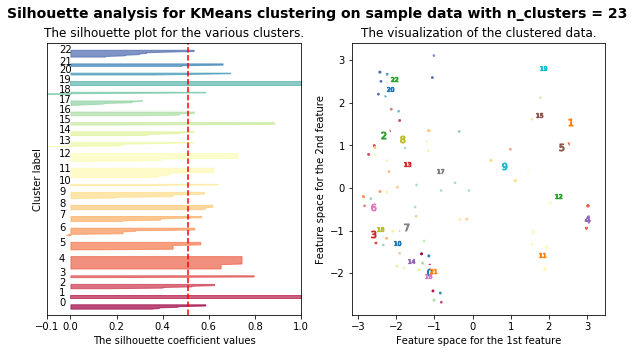

For n_clusters = 24 The average silhouette_score is : 0.5134364322827283


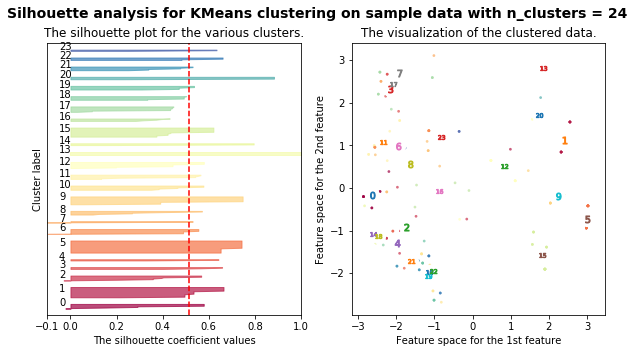

For n_clusters = 25 The average silhouette_score is : 0.5389515934417357


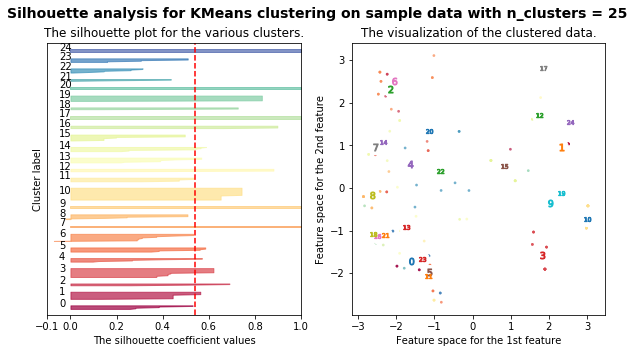

For n_clusters = 26 The average silhouette_score is : 0.5335158447097308


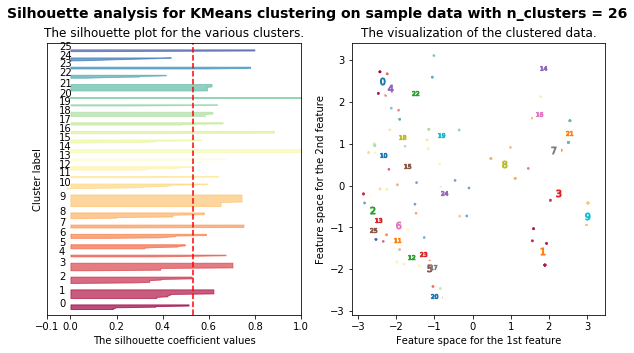

For n_clusters = 27 The average silhouette_score is : 0.5412066619013709


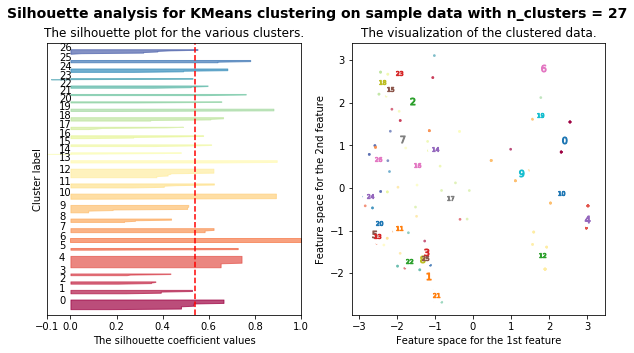

For n_clusters = 28 The average silhouette_score is : 0.5653531804555559


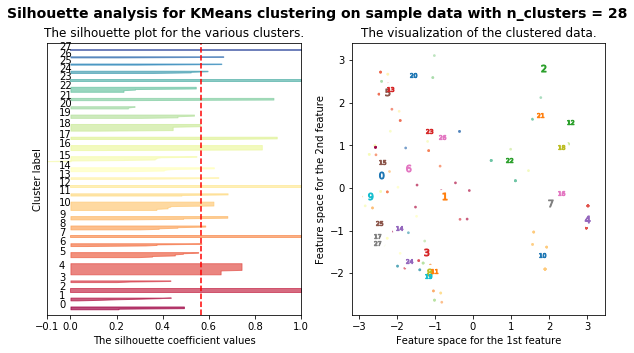

For n_clusters = 29 The average silhouette_score is : 0.5624907257208888


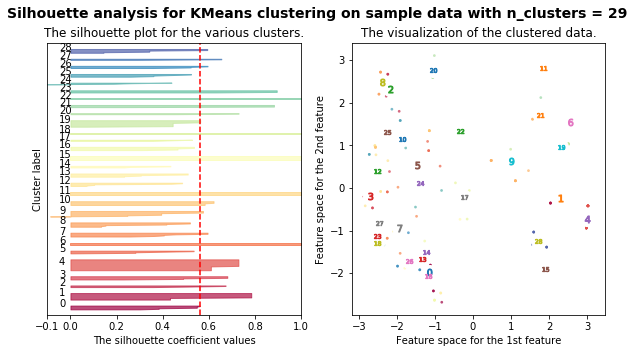

[1158.1681144534848, 923.3236578714117, 760.7455237341169, 616.4363442043161, 515.3381587245252, 436.2406909147728, 387.170217958017, 337.94553855828485, 309.9956739873344, 294.7558162996046, 269.5586395905767, 255.22025168517592, 237.7089495205854, 223.90992167533204, 208.6361765748635, 195.288183508751, 182.27683244370002, 172.51120706844685, 159.13555125667415, 150.2663476582011, 139.76794202897162, 133.00933828443533, 125.45257797073245, 120.28923902093356, 111.01293290504543, 106.01920399888903, 98.01166198184208, 95.84194353734878]


In [167]:
#Apply KMeans algorithm on the above transformed data. 
wcss = []
for cluster in range(2,30):
    clusterer = KMeans(n_clusters=cluster,init='k-means++', n_init=10, max_iter=300, random_state=0)
    cluster_labels = clusterer.fit_predict(X_train_std_pc)
    optimal_cluster_analysis(X_train_std_pc, cluster, cluster_labels)
    wcss.append(clusterer.inertia_)
    
print(wcss)

In [169]:
def plot_line_chart(data, xlabel, ylabel, x_lowerlim, x_upperlim, plot_name):
    plt.figure(figsize=(10,10))
    plt.plot(data, 'bx-')
    plt.xlim(x_lowerlim, x_upperlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(plot_name)
    plt.grid(True)
    plt.show()

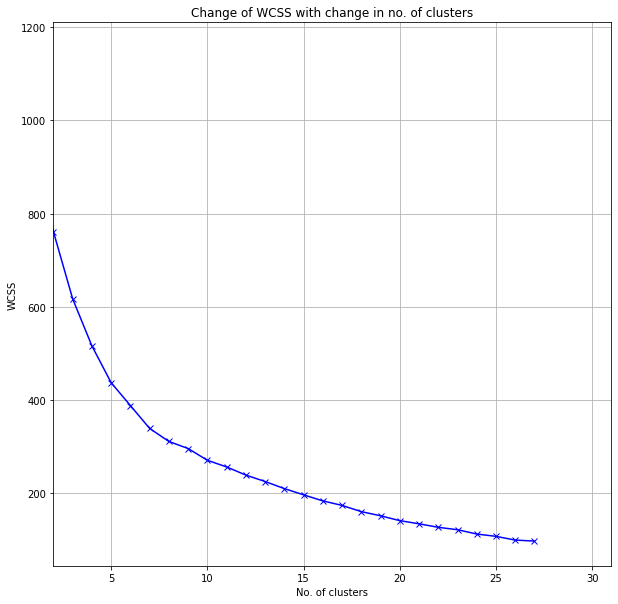

In [170]:
plot_line_chart(wcss, 'No. of clusters', 'WCSS', 2, 31, 'Change of WCSS with change in no. of clusters')

For n_clusters = 20 The average silhouette_score is : 0.48777902271268503


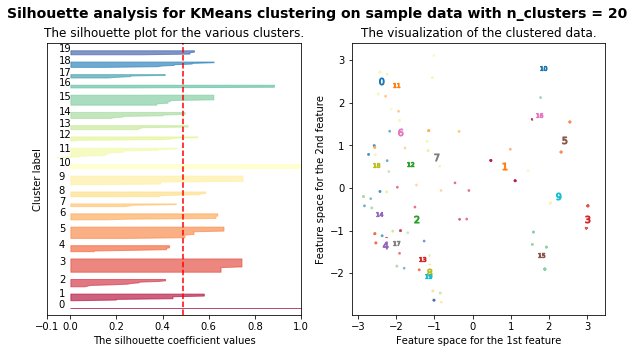

Predicted Clusters (Train Data): 
[15 13 12  8  5  5  6 18  8  3  6  3  8 11  4 19 11  8  5  3 13 18 19  5
  4  9  4 16  2  7  3  4 13  2  7  4 15  2 12 11 16  2  3 17  9 12  5 10
  9 18 18  3 15 15 10  7 10 15 15 19  6  9  3 18  1  0  8  1 14  1  0 17
  3  6 16 10 18  5  5  2 17  5  3  3  4 13  2  6 11  6  5 11 18  3  2 15
 19  5  7 11  8  3  5  5  6  9  6  3  8  8 18  1  4 11  1 15 11  5  3  4
  2  9 13 15 16  5 10 13 15  9  4  3  3 15  5 11 14 14  1 14  3  9 11  5
 14  9 10 13 10 12  9  9  1  2 19 14  3  2 14  1  5 19 15  3 15 18 12  1
 19  9 11 14 11 14 17 16 17 11  9  4  1  3  2  3  2  6 11 12 11 14 15  7
  6 15 15 12  9 17  1  5]


In [173]:
#Select optimal number of clusters and form clusters out of the train data.
cluster = 20
clusterer = KMeans(n_clusters=cluster,init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = clusterer.fit_predict(X_train_std_pc)
optimal_cluster_analysis(X_train_std_pc, cluster, cluster_labels)

print('Predicted Clusters (Train Data): ')
print(cluster_labels)

In [189]:
cluster_labels.dtype

dtype('int32')

In [190]:
#Create a new column in the train data and populate it with the cluster labels.
X_train['Predicted Cluster'] = list(cluster_labels)
X_train.head(5)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [184]:
clf = SVC(kernel='rbf', gamma=0.025, C=3)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print(y_pred)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0]


In [185]:
#Check accuracy and confusion matrix.¶
print('The training score: ', clf.score(X_test, y_test))

The training score:  0.8


In [186]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[33,  1],
       [ 9,  7]])

In [187]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.88      0.44      0.58        16

    accuracy                           0.80        50
   macro avg       0.83      0.70      0.73        50
weighted avg       0.81      0.80      0.78        50

